In [1]:
import pandas as pd

# Cleaning Data

## Reaction Types

In [2]:
reactionTypesDF = pd.read_csv('ReactionTypes.csv')
reactionTypesDF.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [3]:
# Removing a column that isn't needed
reactionTypesDF = reactionTypesDF.drop(['Unnamed: 0'], axis=1)

In [4]:
reactionTypesDF.isnull().any(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [5]:
reactionTypesDF.rename(columns={'Type': 'Reaction Type'}, inplace = True)
reactionTypesDF.head()

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [6]:
# For saving the cleaned dataset
# reactionTypesDF.to_csv('ReactionTypes.csv')

## Reactions

In [7]:
reactionsDF = pd.read_csv('Reactions.csv')
reactionsDF.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [8]:
# Removing a column that isn't needed
reactionsDF = reactionsDF.drop(['Unnamed: 0'], axis=1)

In [9]:
# Removing rows containing NaN values
reactionsDF = reactionsDF[reactionsDF.Type.notnull()]
reactionsDF.head()

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [10]:
# Removing the User ID column because it is not relevant for analysis
reactionsDF = reactionsDF.drop(['User ID'], axis=1)

In [11]:
reactionsDF['Type'].isnull().values.any()

False

In [12]:
# Renaming the Type column to Reaction Type to be more specific
reactionsDF.rename(columns={'Type': 'Reaction Type'}, inplace = True)

In [13]:
reactionsDF.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [14]:
# # For saving the cleaned dataset
# reactionsDF.to_csv('Reactions.csv')

## Content

In [15]:
contentDF = pd.read_csv('Content.csv')
contentDF.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [16]:
# We do not need the User ID and URL columns in this data set for our analysis
contentDF = contentDF.drop(['Unnamed: 0','User ID','URL'], axis=1)

In [17]:
contentDF.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [18]:
# Renaming column Type to Content Type to be more specific
contentDF.rename(columns={'Type': 'Content Type'}, inplace = True)

In [19]:
# Making sure in the category column that the data is clean
contentDF['Category'].value_counts()

technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
healthy eating       61
food                 61
cooking              60
tennis               58
soccer               58
education            57
dogs                 56
studying             55
public speaking      48
veganism             48
Fitness               5
Science               4
Animals               4
Soccer                3
"culture"             3
"soccer"              3
Food                  2
"dogs"                2
Studying              2
Travel                2
Education             2
Technology            1
"veganism"            1
"tennis"              1
"food"                1
"studying"            1
Culture               1
"technology"          1
"cooking"             1
"animals"             1
Healthy Eating        1
"public speaking"     1
Public Speaking       1
"science"             1
Veganism              1
Name: Category, 

In [20]:
# Cleaning category values for duplicates, removing quoates and case sensitivity
contentDF['Category'] = contentDF['Category'].str.lower()
contentDF['Category'] = contentDF['Category'].str.replace('"',"")

In [21]:
contentDF['Category'].value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
dogs               58
studying           58
veganism           50
public speaking    50
Name: Category, dtype: int64

In [22]:
contentDF.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [23]:
contentDF.isnull().values.any()

False

In [24]:
# For saving the cleaned dataset
# contentDF.to_csv('Content.csv')

# Merging Tables

In [25]:
# Merging the reactions data with the content data based on the same Content ID
mergedTable = pd.merge(reactionsDF, contentDF, how = 'inner', on = 'Content ID')

In [26]:
mergedTable.head()

,Content ID,Reaction Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying


In [27]:
# Merging our new merged table with the reaction types dataset based on Reaction Type
mergedTable = pd.merge(mergedTable, reactionTypesDF, how = 'inner', on = 'Reaction Type')
mergedTable.to_excel('MergedTable.xlsx')

In [28]:
mergedTable

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [29]:
mergedTable['Category'].value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [30]:
# Getting the sum of scores for each category

df_groupedCat = mergedTable.groupby(by='Category', as_index = False).agg({'Score':'sum'})
df_groupedCat.rename(columns={'Score': 'Sum'}, inplace = True)
df_groupedCat

,Category,Sum
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436
5,fitness,55323
6,food,66676
7,healthy eating,69339
8,public speaking,49264
9,science,71168


In [31]:
# Sorting the sums in descending order to get the top 5 categories
top5 = df_groupedCat.sort_values(by = 'Sum', ascending = False).head()
top5

,Category,Sum
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


In [32]:
# Saving the cleaned merged data tables and the top 5 categories results onto an excel spreadsheet

with pd.ExcelWriter('AccentureT2_Results.xlsx') as writer:
    mergedTable.to_excel(writer, sheet_name='Results', index=False)
    top5.to_excel(writer, sheet_name='Results', startrow= 0, startcol= 8, index=False)

<AxesSubplot:ylabel='Category'>

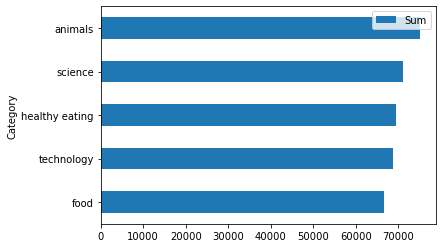

In [58]:
top5.sort_values(by = 'Sum',ascending = True).plot.barh('Category', 'Sum')

In [33]:
mergedTable
mergedTable[['Date','Time']] = mergedTable.Datetime.str.split(expand=True)

In [34]:
mergedTable = mergedTable.drop(['Datetime'], axis = 1)

In [40]:
mergedTable
mergedTable['Date']= pd.to_datetime(mergedTable['Date'])

In [41]:
mergedTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction Type  24573 non-null  object        
 2   Content Type   24573 non-null  object        
 3   Category       24573 non-null  object        
 4   Sentiment      24573 non-null  object        
 5   Score          24573 non-null  int64         
 6   Date           24573 non-null  datetime64[ns]
 7   Time           24573 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.7+ MB


In [42]:
mergedTable.to_excel('MergedTable.xlsx')

In [52]:
book2DF = pd.read_excel('Book2.xlsx')
book2DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction Type  24573 non-null  object        
 2   Content Type   24573 non-null  object        
 3   Category       24573 non-null  object        
 4   Sentiment      24573 non-null  object        
 5   Score          24573 non-null  int64         
 6   Date           24573 non-null  datetime64[ns]
 7   Time           24573 non-null  object        
 8   Month Year     24573 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.7+ MB


In [54]:
book2DF['Month Year'].value_counts()

2021/05    2138
2021/01    2126
2020/08    2114
2020/12    2092
2020/07    2070
2020/10    2056
2020/11    2034
2020/09    2022
2021/03    2012
2021/04    1974
2021/02    1914
2021/06    1129
2020/06     892
Name: Month Year, dtype: int64